In [1]:
import torch
import torch.nn as nn
import os
import mlp.data_providers as data_providers
import numpy as np
from storage_utils import load_statistics
from collections import OrderedDict
from model_architectures import ConvolutionalNetwork
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
train_data = data_providers.EMNISTDataProvider('train', batch_size=100000)
val_data = data_providers.EMNISTDataProvider('valid', batch_size=15800)
test_data = data_providers.EMNISTDataProvider('test', batch_size=1)

KeysView(<numpy.lib.npyio.NpzFile object at 0x114b79438>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x114b79320>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x114b79470>)


In [3]:
downsamples = ['max_pooling', 'avg_pooling', 'strided_convolution', 'dilated_convolution']
runs = ['run1', 'run2', 'run3']
models = OrderedDict()
stats = OrderedDict()
stats_means = OrderedDict()
stats_stds = OrderedDict()

batch_size = 100
image_num_channels = 1
image_height = 28
image_width = 28
num_filters = 128
num_layers = 4
kernel_sizes = 3
num_epochs = 30
weight_decay_coefficient = 1e-5
seed = 7112018
use_gpu = False

In [4]:
def rename_dict_key(old_dict):
    new_dict = OrderedDict()
    for key in old_dict.keys():
        new_dict[key[6:]] = old_dict[key]
    return new_dict

In [23]:
# load summary stats
for run in runs:
    for downsample in downsamples:
        experiment_log_dir = './outputs/'+ run + '/downsample/' + downsample + '/result_outputs/'
        summary = load_statistics(experiment_log_dir, 'summary.csv')
        stats[run + downsample] = summary

for downsample in downsamples:
    train_accs = []
    valid_accs = []
    means_dict = {}
    stds_dict ={}
    for run in runs:
        summary = stats[run + downsample]
        train_accs.append(summary['train_acc'])
        valid_accs.append(summary['val_acc'])
    train_accs = np.array(train_accs, dtype='float')
    valid_accs = np.array(valid_accs, dtype='float')
    train_accs = train_accs * 100
    valid_accs = valid_accs * 100
    means_dict['train_acc'] = np.mean(train_accs, axis=0)
    means_dict['val_acc'] = np.mean(valid_accs, axis=0)
    stds_dict['train_acc'] = np.std(train_accs, axis=0)
    stds_dict['val_acc'] = np.std(valid_accs, axis=0)
    stats_means[downsample] = means_dict
    stats_stds[downsample] = stds_dict

In [22]:
test_stats=OrderedDict()

# load test stats
for run in runs:
    for downsample in downsamples:
        experiment_log_dir = './outputs/'+ run + '/downsample/' + downsample + '/result_outputs/'
        summary = load_statistics(experiment_log_dir, 'test_summary.csv')
        test_stats[run+downsample] = summary['test_acc'][0]

for downsample in downsamples:
    accs = []
    for run in runs:
        accs.append(test_stats[run+downsample])
    accs = np.array(accs, dtype='float')
    accs = accs * 100
    print(downsample + 'test_acc: {0:.2f} ({1:.4f})'.format(np.mean(accs), np.std(accs)))

max_poolingtest_acc: 87.86 (0.1241)
avg_poolingtest_acc: 87.85 (0.1049)
strided_convolutiontest_acc: 87.56 (0.0831)
dilated_convolutiontest_acc: 88.74 (0.0953)


In [56]:
dc_stats=OrderedDict()

# load test stats
for run in runs:
    experiment_log_dir = './outputs/'+ run + '/dc/dc/result_outputs/'
    summary = load_statistics(experiment_log_dir, 'test_summary.csv')
    dc_stats[run] = summary['test_acc'][0]

accs = []
for run in runs:
    accs.append(dc_stats[run])
accs = np.array(accs, dtype='float')
accs = accs * 100
print(downsample + 'padding_1 test_acc: {0:.2f} ({1:.4f})'.format(np.mean(accs), np.std(accs)))

dilated_convolutionpadding_1 test_acc: 88.09 (0.1742)


In [62]:
downsample = 'dilated_conv_padding_1'
# load summary stats
for run in runs:
    experiment_log_dir = './outputs/'+ run + '/dc/dc/result_outputs/'
    summary = load_statistics(experiment_log_dir, 'summary.csv')
    stats[run + downsample] = summary

train_accs = []
valid_accs = []
means_dict = {}
stds_dict ={}
for run in runs:
    summary = stats[run + downsample]
    train_accs.append(summary['train_acc'])
    valid_accs.append(summary['val_acc'])
train_accs = np.array(train_accs, dtype='float')
valid_accs = np.array(valid_accs, dtype='float')
train_accs = train_accs * 100
valid_accs = valid_accs * 100
means_dict['train_acc'] = np.mean(train_accs, axis=0)
means_dict['val_acc'] = np.mean(valid_accs, axis=0)
stds_dict['train_acc'] = np.std(train_accs, axis=0)
stds_dict['val_acc'] = np.std(valid_accs, axis=0)
stats_means[downsample] = means_dict
stats_stds[downsample] = stds_dict

In [60]:
pool_stats=OrderedDict()

# load test stats
for run in runs:
    for downsample in ['max', 'avg']:
        experiment_log_dir = './outputs/'+ run + '/pool/' + downsample +'/result_outputs/'
        summary = load_statistics(experiment_log_dir, 'test_summary.csv')
        pool_stats[run+downsample] = summary['test_acc'][0]

for downsample in ['max', 'avg']:
    accs = []
    for run in runs:
        accs.append(pool_stats[run+downsample])
    accs = np.array(accs, dtype='float')
    accs = accs * 100
    print(downsample + 'test_acc: {0:.2f} ({1:.4f})'.format(np.mean(accs), np.std(accs)))

maxtest_acc: 88.02 (0.0853)
avgtest_acc: 87.71 (0.0368)


In [63]:
downsamples = ['max', 'avg']
# load summary stats
for run in runs:
    for downsample in downsamples:
        experiment_log_dir = './outputs/'+ run + '/pool/' + downsample + '/result_outputs/'
        summary = load_statistics(experiment_log_dir, 'summary.csv')
        stats[run + downsample] = summary

for downsample in downsamples:
    train_accs = []
    valid_accs = []
    means_dict = {}
    stds_dict ={}
    for run in runs:
        summary = stats[run + downsample]
        train_accs.append(summary['train_acc'])
        valid_accs.append(summary['val_acc'])
    train_accs = np.array(train_accs, dtype='float')
    valid_accs = np.array(valid_accs, dtype='float')
    train_accs = train_accs * 100
    valid_accs = valid_accs * 100
    means_dict['train_acc'] = np.mean(train_accs, axis=0)
    means_dict['val_acc'] = np.mean(valid_accs, axis=0)
    stds_dict['train_acc'] = np.std(train_accs, axis=0)
    stds_dict['val_acc'] = np.std(valid_accs, axis=0)
    stats_means[downsample] = means_dict
    stats_stds[downsample] = stds_dict

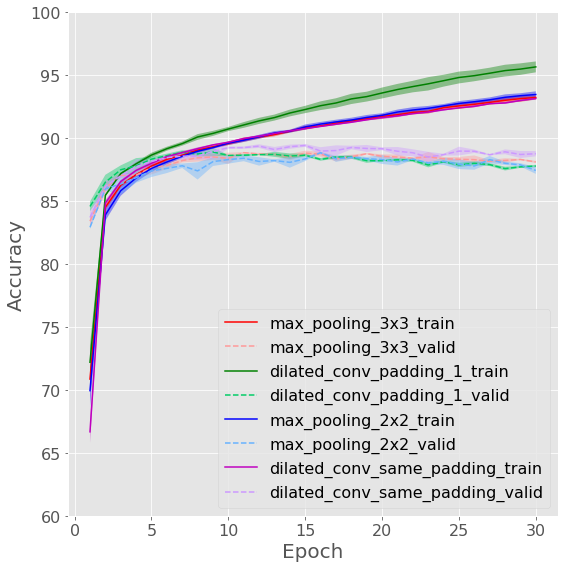

In [70]:
downsamples = ['max', 'dilated_conv_padding_1', 'max_pooling', 'dilated_convolution']
names = ['max_pooling_3x3', 'dilated_conv_padding_1', 'max_pooling_2x2', 'dilated_conv_same_padding']
# training accuracy plot
plt.figure(figsize=(8,8))
colors = ['r', 'g', 'b', 'm', '#F14824', '#048E64']
colors2 = ['#FF9999', '#00CC66', '#66B2FF', '#CC99FF', '#FF8000', '#048E73']
# ,  
for model_name, name, c, c2 in zip(downsamples, names, colors, colors2):
    statistics = stats_means[model_name]
    train_acc = statistics['train_acc']
    valid_acc = statistics['val_acc']
    train_error = stats_stds[model_name]['train_acc']
    valid_error = stats_stds[model_name]['val_acc']
    plt.plot(np.arange(1, len(train_acc)+1), np.array(train_acc, dtype='float'), label=name+'_train', c=c)
    plt.fill_between(np.arange(1, len(train_acc)+1), train_acc - train_error, train_acc + train_error, alpha=0.4, facecolor=c)
    plt.plot(np.arange(1, len(valid_acc)+1), np.array(valid_acc, dtype='float'), label=name+'_valid', c=c2, linestyle='--')
    plt.fill_between(np.arange(1, len(valid_acc)+1), valid_acc - valid_error, valid_acc + valid_error, alpha=0.4 ,facecolor=c2)
    
plt.legend(loc=4, fontsize=16)
plt.ylim((60, 100))
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.tick_params(axis='both', labelsize=16)
plt.tight_layout()
# plt.title('Broaden Context', fontsize=20)
plt.savefig('./plots/others.pdf', dpi=400)

In [ ]:
# training accuracy plot
plt.figure(figsize=(8,8))
colors = ['r', 'g', 'b', 'm']
colors2 = ['#FF9999', '#00CC66', '#66B2FF', '#CC99FF']
# '#FF8000',  
for model_name, c, c2 in zip(downsamples,  colors, colors2):
    statistics = stats_means[model_name]
    train_acc = statistics['train_acc']
    valid_acc = statistics['val_acc']
    train_error = stats_stds[model_name]['train_acc']
    valid_error = stats_stds[model_name]['val_acc']
    plt.plot(np.arange(1, len(train_acc)+1), np.array(train_acc, dtype='float'), label=model_name+'_train', c=c)
    plt.fill_between(np.arange(1, len(train_acc)+1), train_acc - train_error, train_acc + train_error, alpha=0.4, facecolor=c)
    plt.plot(np.arange(1, len(valid_acc)+1), np.array(valid_acc, dtype='float'), label=model_name+'_valid', c=c2, linestyle='--')
    plt.fill_between(np.arange(1, len(valid_acc)+1), valid_acc - valid_error, valid_acc + valid_error, alpha=0.4 ,facecolor=c2)
    
plt.legend(loc=4, fontsize=16)
plt.ylim((60, 100))
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.tick_params(axis='both', labelsize=16)
plt.tight_layout()
# plt.title('Broaden Context', fontsize=20)
plt.savefig('./plots/downsamples.pdf', dpi=400)
# 

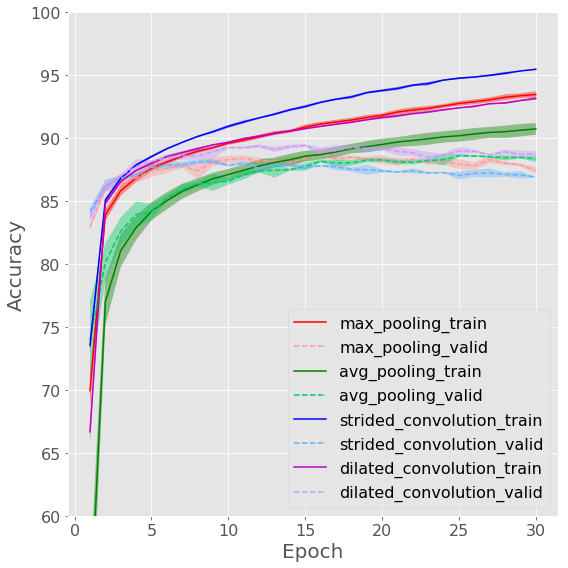

In [53]:
# training accuracy plot
plt.figure(figsize=(8,8))
colors = ['r', 'g', 'b', 'm']
colors2 = ['#FF9999', '#00CC66', '#66B2FF', '#CC99FF']
# '#FF8000',  
for model_name, c, c2 in zip(downsamples,  colors, colors2):
    statistics = stats_means[model_name]
    train_acc = statistics['train_acc']
    valid_acc = statistics['val_acc']
    train_error = stats_stds[model_name]['train_acc']
    valid_error = stats_stds[model_name]['val_acc']
    plt.plot(np.arange(1, len(train_acc)+1), np.array(train_acc, dtype='float'), label=model_name+'_train', c=c)
    plt.fill_between(np.arange(1, len(train_acc)+1), train_acc - train_error, train_acc + train_error, alpha=0.4, facecolor=c)
    plt.plot(np.arange(1, len(valid_acc)+1), np.array(valid_acc, dtype='float'), label=model_name+'_valid', c=c2, linestyle='--')
    plt.fill_between(np.arange(1, len(valid_acc)+1), valid_acc - valid_error, valid_acc + valid_error, alpha=0.4 ,facecolor=c2)
    
plt.legend(loc=4, fontsize=16)
plt.ylim((60, 100))
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.tick_params(axis='both', labelsize=16)
plt.tight_layout()
# plt.title('Broaden Context', fontsize=20)
plt.savefig('./plots/downsamples.pdf', dpi=400)
# 

In [14]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

best_idxs = []
best_valid_accs = []
best_train_accs = []
num_params = []
# load best models
for model_name in downsamples:
    print(model_name)
    conv_model = ConvolutionalNetwork(
        input_shape=(batch_size, image_num_channels, image_height, image_width),
        dim_reduction_type=model_name,
        num_output_classes=47, 
        num_filters=64, 
        num_layers=4, 
        kernel_size=3,
        use_bias=True)
    
    model_save_dir = './outputs/run1/downsample/' + model_name + '/saved_models/'
    path = os.path.join(model_save_dir, "{}_{}".format("train_model", 29))
    
    device = torch.device('cpu')
    state = torch.load(path, map_location=device)
    new_state = rename_dict_key(state['network'])
    conv_model.load_state_dict(state_dict=new_state)
    conv_model.eval()
    
    models[model_name] = conv_model
    num = count_parameters(conv_model)
    num_params.append(num)

max_pooling
Building basic block of ConvolutionalNetwork using input shape (100, 1, 28, 28)
torch.Size([100, 64, 28, 28])
torch.Size([100, 64, 15, 15])
torch.Size([100, 64, 15, 15])
torch.Size([100, 64, 8, 8])
torch.Size([100, 64, 8, 8])
torch.Size([100, 64, 5, 5])
torch.Size([100, 64, 5, 5])
torch.Size([100, 64, 3, 3])
shape before final linear layer torch.Size([100, 64, 2, 2])
Block is built, output volume is torch.Size([100, 47])
avg_pooling
Building basic block of ConvolutionalNetwork using input shape (100, 1, 28, 28)
torch.Size([100, 64, 28, 28])
torch.Size([100, 64, 15, 15])
torch.Size([100, 64, 15, 15])
torch.Size([100, 64, 8, 8])
torch.Size([100, 64, 8, 8])
torch.Size([100, 64, 5, 5])
torch.Size([100, 64, 5, 5])
torch.Size([100, 64, 3, 3])
shape before final linear layer torch.Size([100, 64, 2, 2])
Block is built, output volume is torch.Size([100, 47])
strided_convolution
Building basic block of ConvolutionalNetwork using input shape (100, 1, 28, 28)
torch.Size([100, 64, 28, 2

In [15]:
num_params

[123503, 123503, 271215, 271215]